# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

\begin{align}
&\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b \\
&\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
\end{align}

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

### Boston DataSet
보스톤의 지역별 집값 데이터셋

 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%) 
 - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)


#### Boston housing dataset loading

In [1]:
import pandas as pd

df = pd.read_csv("data/boston_hosing.csv")
df.shape

(506, 14)

In [4]:
X = df.drop(columns='MEDV')
y = df['MEDV']

In [6]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
- attribute(학습 후 조회가능)
    - **coef_**: 각 Feature에 곱하는 가중치
    - **intercept_**: y절편. 모든 Feature가 0일때 예측값
    
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

##### Feature scaling

In [7]:
## trainset으로 fit 한 것으로 train/test/validation set 변환.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
#### 학습 후 찾은 weights 와 bias 조회
print("weights")
# print(lr.coef_)
pd.Series(lr.coef_, index=X.columns)

weights


CRIM      -0.970820
ZN         1.057149
INDUS      0.038311
CHAS       0.594506
NOX       -1.855148
RM         2.573219
AGE       -0.087615
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
B          0.718179
LSTAT     -3.592455
dtype: float64

In [13]:
print("bias-모든 feature들이 0일 때 y값")
lr.intercept_

bias-모든 feature들이 0일 때 y값


22.611881188118804

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

In [22]:
import numpy as np
X_test_scaled[0][np.newaxis, ...].shape

(1, 13)

In [26]:
X_test_scaled[0][np.newaxis, ...]

array([[-0.40835869, -0.49960763, -1.12872913, -0.27288841, -0.83336883,
         0.04497197, -1.84621525,  0.69506929, -0.62464765,  0.15913664,
        -0.71272928,  0.18547577, -0.73610347]])

In [27]:
lr.predict(X_test_scaled[0][np.newaxis, ...])

array([24.88963777])

In [31]:
lr.coef_[..., np.newaxis].shape

(13, 1)

In [33]:
X_test_scaled[0][np.newaxis, ...] @ lr.coef_[..., np.newaxis] + lr.intercept_  # 행렬(2차원) @ 2차원 => (1, 13) @ (13, 1)

array([[24.88963777]])

In [36]:
X_test_scaled[0] @ lr.coef_ + lr.intercept_  # 1차원 @ 1차원

24.8896377727566

In [39]:
y_test.iloc[0]

22.6

##### 평가

In [41]:
## 회귀 - mse, rmse, (ma-절대값-e), r2
from metrics import print_regression_metrcis

print_regression_metrcis(y_train, lr.predict(X_train_scaled), title="Transet")

Transet
MSE: 19.326470203585725
RMSE: 4.396188144698282
R Squared: 0.7730135569264234


In [42]:
print_regression_metrcis(y_test, lr.predict(X_test_scaled), title="Testset")

Testset
MSE: 33.448979997676496
RMSE: 5.783509315085133
R Squared: 0.5892223849182512


In [45]:
####### Pipeline 이용
from sklearn.pipeline import Pipeline

pl = Pipeline([
    ("scaler", StandardScaler()), ("model", LinearRegression())
], verbose=True)

pl.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [47]:
pred = pl.predict(X_test)
pred[:10]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ])

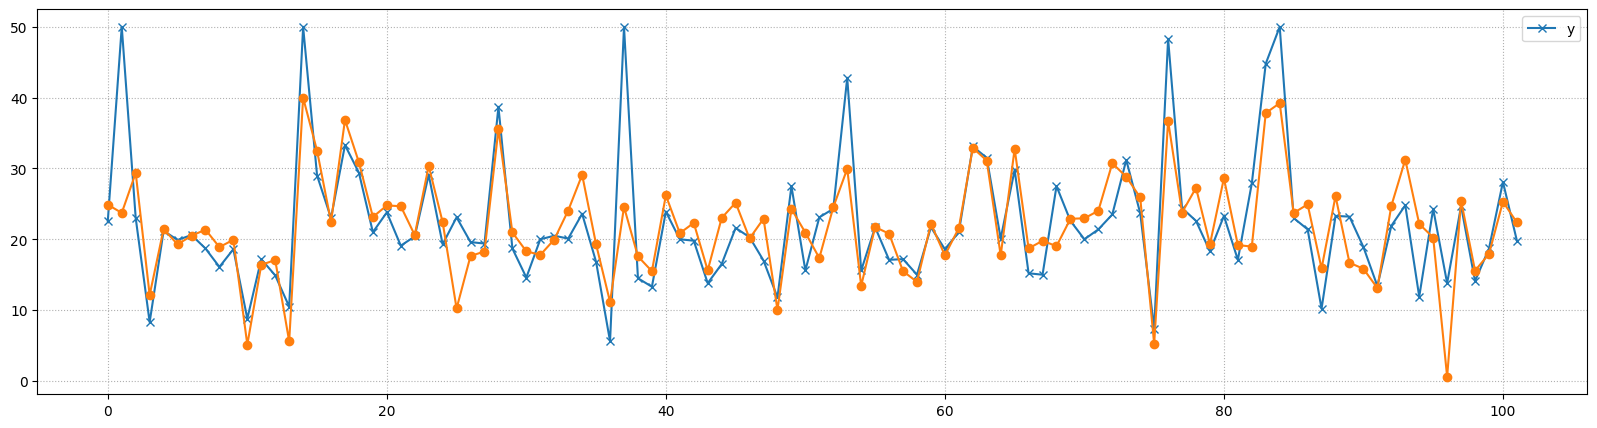

In [53]:
### y_test 정답과 추론값 비교 - 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(range(y_test.size), y_test, marker="x", label="y")
plt.plot(range(y_test.size), pred, marker='o', label="")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터(Coef, weight)를 기준으로는 일차식이 되어 선형모델이다. 그렇지만 input 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

(100, 1) (100,)


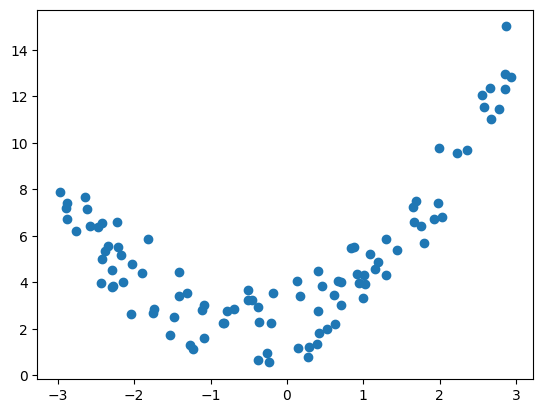

In [59]:
import matplotlib.pyplot as plt
plt.scatter(X,  y)
plt.show()

##### 모델생성, 학습

In [60]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

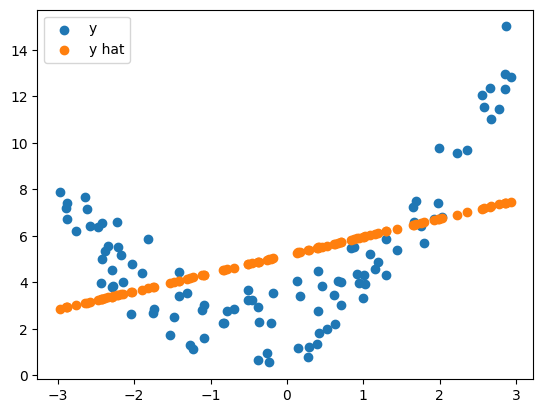

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X,  y, label="y")
plt.scatter(X, pred, label='y hat')
plt.legend()
plt.show()

In [63]:
lr.coef_, lr.intercept_

(array([0.78189543]), 5.175619278567209)

In [64]:
print_regression_metrcis(y, pred)

MSE: 7.729204760808937
RMSE: 2.7801447373848966
R Squared: 0.19138252437306003


In [65]:
y.mean()

5.047985043575299

##### PolynomialFeatures를 이용해 다항회귀구현

##### LinearRegression 모델을 이용해 평가

##### 시각화

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

### PolynomialFeatures 예제

### PolynomialFeatures를 Boston Dataset에 적용

##### 모델 생성 학습 추론 평가

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

## 규제 alpha 에 따른 weight 변화

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

##### LinearRegression으로 평가

##### Ridge 의 alpha값 변화에 따른 R square 확인

##### lasso 의 alpha값 변화에 따른 R square 확인

## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.